In [305]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib notebook

In [306]:
G = 6.67408e-11 # м^3 кг^-1 с^-2

In [307]:
class Star:
    def __init__(self, mass, R=0):
        self.M = mass
        self.X = 0.
        self.R = R
        self.alive = True

In [308]:
class CosmicBody:
    def __init__(self, mass, vec_v, vec_P, R=0):
        self.M = mass
        self.X = np.array(vec_P, dtype=np.float64)
        self.V = np.array(vec_v, dtype=np.float64)
        self.A = np.zeros_like(self.V, dtype=np.float64)
        self.R = R
        self.alive = True
        
    def gravitate(self, bodies: list):
        if not self.alive:
            return
        self.A = 0
        for body in bodies:
            r = body.X - self.X
            if np.linalg.norm(r) < self.R + body.R:
                self.destroy()
            self.A += G * body.M * r / np.linalg.norm(r) ** 3
            
    def step(self, dt: float):
        if not self.alive:
            return
        self.X += self.V * dt + self.A * dt ** 2 / 2
        self.V += self.A * dt
        
    def destroy(self):
        self.alive = False

In [355]:
class System:
    def __init__(self, star, bodies, start_t=0, dt=1e-3):
        self.star = star
        self.bodies = bodies
        self.t = [start_t]
        self.dt = dt
        self.trajectories = [[body.X.copy()] for body in self.bodies]
        
    def save_state(self):
        for i, body in enumerate(self.bodies):
            self.trajectories[i].append(body.X.copy())
        
    def build_trajectories(self, T):
        self.t = [self.t[0]]
        while self.t[-1] < T:
            bodies = [body for body in self.bodies if body.alive]
            if len(bodies) == 0:
                print("All bodies destroyed")
                return
            for i, body in enumerate(bodies):
                body.gravitate([self.star, *self.bodies[:i], *self.bodies[i+1:]])
            for body in self.bodies:
                body.step(self.dt)
            self.save_state()
            self.t.append(self.t[-1] + self.dt)
            
    def draw(self):
        fig, ax = plt.subplots()
        
        lines = []
        bodies = []
        for _ in self.trajectories:
            lines.append(ax.plot([], [], 'b')[0])
            bodies.append(ax.plot([], [], 'bo')[0])
        trajectories = np.array(self.trajectories)
        
        max_ = trajectories.max() * 1.1
        ax.axis([-max_, max_, -max_, max_])
        ax.scatter(0, 0, c='r')
        
        def animate(i):
            for line, body, trajectory in zip(lines, bodies, trajectories):
                line.set_data(trajectory[:i, 0], trajectory[:i, 1])
                body.set_data(trajectory[i, 0], trajectory[i, 1])

        return FuncAnimation(fig, animate, frames=len(self.t), interval=1)

In [399]:
system = System(
    Star(mass=2e11), 
    [CosmicBody(1e11, [0, 0], [1, 0]), CosmicBody(1e11, [0, 0], [0, 1])], 
    dt=1
)

In [400]:
system.build_trajectories(100)

<IPython.core.display.Javascript object>


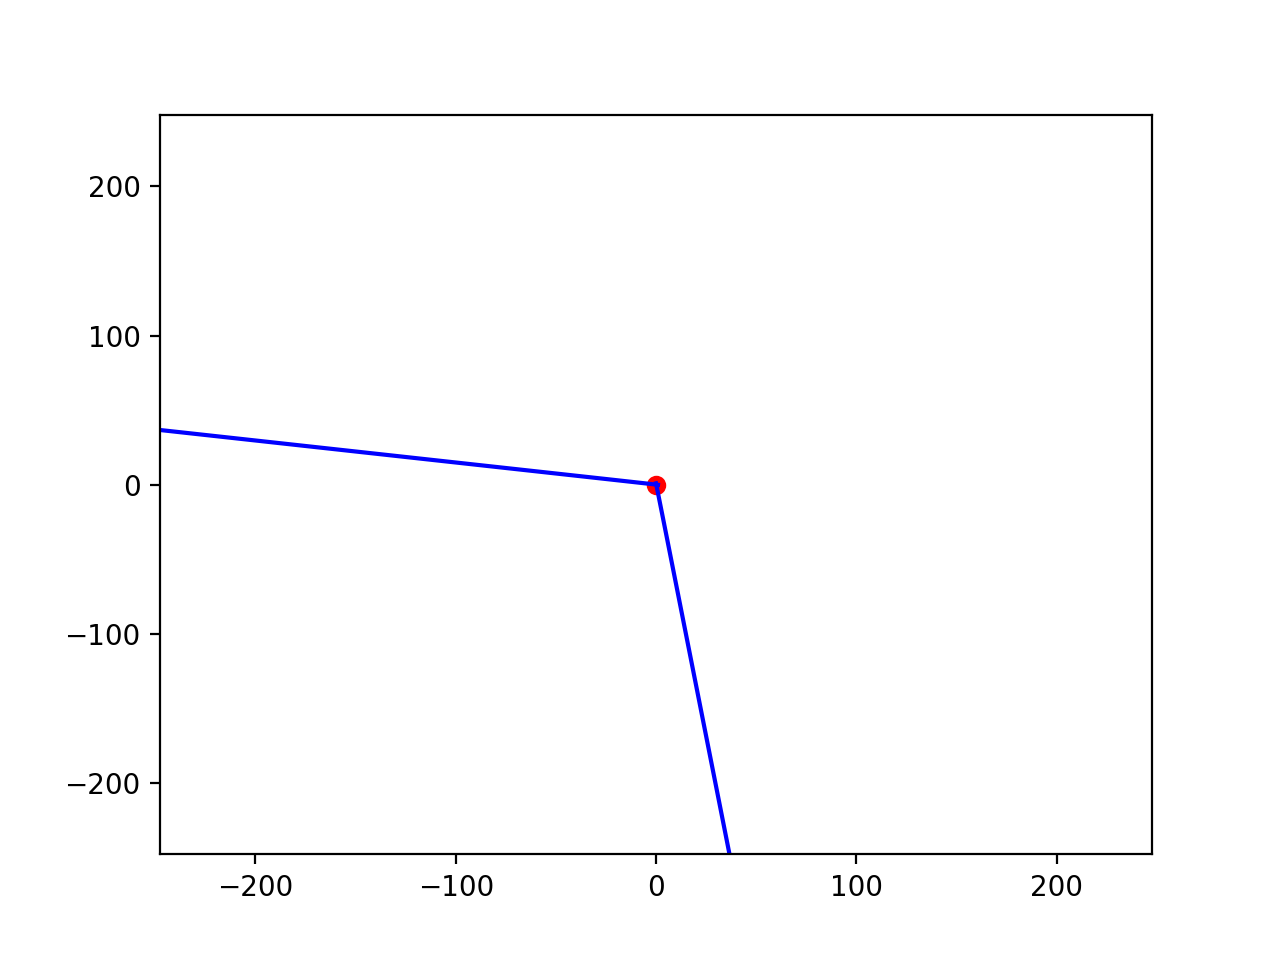

In [401]:
system.draw()

In [398]:
system.trajectories[0][-1]

array([-1392.69999346,   -95.20533883])